True
Mean Percentage Variance: 1.3550527736480302


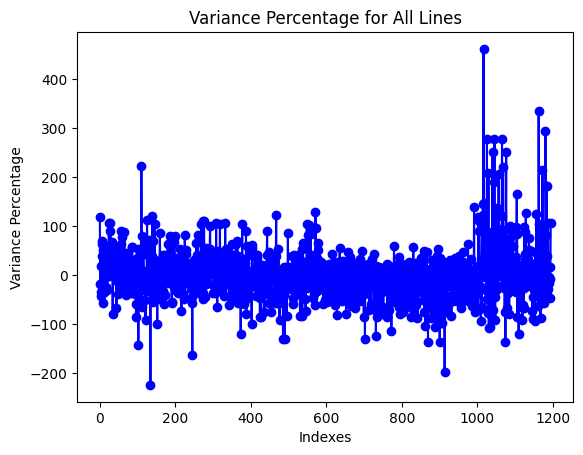

,Predicted Price,Original Price,Variance,Variance %
0,-3503745,970000,4473745,461.210825
1,-2807261,1195000,4002261,334.917238


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import copy
import pickle
import matplotlib.pyplot as plt

cities = ['2800', '2820', '2830', '2840', '2850', '2900', '2920', '2930', '2942', '2950','3000','3460']
energy_classes = ['A2020', 'A2015', 'A2010', 'B', 'C', 'D', 'E', 'F', 'G']
types = ['Villa','Ejerlejlighed','Rækkehus','Villalejlighed']

dataframes = []

for city in cities:
    filename = f'./data/house_data/house_data_{city}.csv'
    df = pd.read_csv(filename)
    df['City'] = city  # Add a 'City' column with the zip code
    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)  



# Fjern rækker med boligtypen "Landejendom"
combined_df = combined_df[combined_df['Type'] != 'Landejendom']

# Fjern rækker med NaN-værdier
combined_df = combined_df.dropna()

# Deepcopy the combined DataFrame
original_df = copy.deepcopy(combined_df)

combined_df = pd.get_dummies(combined_df, columns=['City', 'Energy class', 'Type'])

scaler = StandardScaler()
combined_df['Size'] = scaler.fit_transform(combined_df[['Size']])

with open('linear_model.pkl', 'rb') as file:
    linear_model = pickle.load(file)

# Forudsig prisen på den nye bolig

predicted_prices = []
df_results = pd.DataFrame(columns=['Predicted Price', 'Original Price', 'Variance'])

print(len(combined_df)==len(original_df))


for idx, row in combined_df.iterrows():
    linenumber = idx 

    original_price = original_df.loc[linenumber, 'Price']

    # Opret et dictionary med værdierne til de nye data
    new_data = {
        'X': combined_df.loc[linenumber, 'X'],
        'Y': combined_df.loc[linenumber, 'Y'],
        'Size': combined_df.loc[linenumber, 'Size'],
        'City_2800': combined_df.loc[linenumber, 'City_2800'],
        'City_2820': combined_df.loc[linenumber, 'City_2820'],
        'City_2830': combined_df.loc[linenumber, 'City_2830'],
        'City_2840': combined_df.loc[linenumber, 'City_2840'],
        'City_2850': combined_df.loc[linenumber, 'City_2850'],
        'City_2900': combined_df.loc[linenumber, 'City_2900'],
        'City_2920': combined_df.loc[linenumber, 'City_2920'],
        'City_2930': combined_df.loc[linenumber, 'City_2930'],
        'City_2942': combined_df.loc[linenumber, 'City_2942'],
        'City_2950': combined_df.loc[linenumber, 'City_2950'],
        'City_3000': combined_df.loc[linenumber, 'City_3000'],
        'City_3460': combined_df.loc[linenumber, 'City_3460'],
        'Energy class_A2010': combined_df.loc[linenumber, 'Energy class_A2020'],
        'Energy class_A2015': combined_df.loc[linenumber, 'Energy class_A2015'],
        'Energy class_A2020': combined_df.loc[linenumber, 'Energy class_A2010'],
        'Energy class_B': combined_df.loc[linenumber, 'Energy class_B'],
        'Energy class_C': combined_df.loc[linenumber, 'Energy class_C'],
        'Energy class_D': combined_df.loc[linenumber, 'Energy class_D'],
        'Energy class_E': combined_df.loc[linenumber, 'Energy class_E'],
        'Energy class_F': combined_df.loc[linenumber, 'Energy class_F'],
        'Energy class_G': combined_df.loc[linenumber, 'Energy class_G'],
        'Type_Ejerlejlighed': combined_df.loc[linenumber, 'Type_Ejerlejlighed'],
        'Type_Rækkehus': combined_df.loc[linenumber, 'Type_Rækkehus'],
        'Type_Villa': combined_df.loc[linenumber, 'Type_Villa'],
        'Type_Villalejlighed': combined_df.loc[linenumber, 'Type_Villalejlighed'],
    }

   # Create a new DataFrame with the new data
    new_df = pd.DataFrame([new_data])

    # Make the prediction
    prediction = int(linear_model.predict(new_df))

     # Calculate the variance
    variance = original_price - prediction

    variance_percent = (variance / original_price) * 100

    # Create a temporary DataFrame with the current iteration's results
    temp_df = pd.DataFrame({'Predicted Price': [prediction],
                            'Original Price': [original_price],
                            'Variance': [variance],
                            'Variance %': [variance_percent]})
    # Concatenate the temporary DataFrame with the df_results DataFrame
    df_results = pd.concat([df_results, temp_df], ignore_index=True)

    predicted_prices.append(prediction)



mean_variance_percent = df_results['Variance %'].mean()

# Print the mean percentage variance
print("Mean Percentage Variance:", mean_variance_percent)


variance_percent = df_results['Variance %']

# Set a threshold for the variance percentage above/below which rows will be considered as high variance
variance_threshold = 300  # Adjust the threshold as per your requirement

# Create a new DataFrame to store rows with high variance
high_variance_df = df_results[(df_results['Variance %'] >= variance_threshold) | (df_results['Variance %'] <= -variance_threshold)]

# Reset the index of the new DataFrame
high_variance_df = high_variance_df.reset_index(drop=True)

# Save the high variance DataFrame 
high_variance_df

# Create an array of line numbers
line_numbers = range(len(variance_percent))

# Create the line plot
plt.plot(line_numbers, variance_percent, marker='o', linestyle='-', color='blue')

# Set labels and title
plt.xlabel('Indexes')
plt.ylabel('Variance Percentage')
plt.title('Variance Percentage for All Lines')

# Show the plot
plt.show()

high_variance_df






